# Unit 4 Case Study:   Future Contract Rolling
### Authors:  Sudip Bhattacharyya, Dan Freeman and Timothy McWilliams

### Date: 5-Jun-2018

### Abstract

Time series models are widely applied in different areas of financial analysis. Future contract rolling ensures a seamless transition between the holding contract and the next one when the date of expiration comes close. At rollover, the new contract prices are estimated based on the relative price changes in the existing contract to avoid any discontinuties. In this case study, two future contract prices (a near contract and a far contract) are constructed with a random walk simulation process for each of three stocks - GE, IBM and Pepsi Co. In addition, rolling correlations between stock priced are also studied to observe the changing relationship between different stock prices.

### Intorduction

### Libraries Loaded

The python libraries primarily used here are numpy and pandas. The library datatime is also loaded to record the time scale for a time series whereas datareader helps to read data directly from a webportal. We also use matplotlib for visualization in this report.

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
import pandas_datareader.data as wb
import datetime as dt
from pandas import Series, DataFrame

style.use('ggplot')
%matplotlib inline

### Data

In this study, we analyze the stock prices of three world renowned firms - GE, IBM and Pepsi Co. over a time period from January 1, 1990 to May 30, 2018. The data was collected from one of the leading investment research and management firm, Morningstar. The data shows both opening and closing stock prices as well as the highest and lowes prices for each business day over the mentioned period. 

A sample of records (top 5 and bottom 5) for all three firms are shown below for a better understanding.

In [2]:
start = dt.datetime(1990, 1, 1)
end = dt.datetime(2018, 5, 30)

ge_raw = wb.DataReader("GE", 'morningstar', start, end)
ibm_raw = wb.DataReader("IBM", 'morningstar', start, end)
pep_raw = wb.DataReader("Pep", 'morningstar', start, end)

display(ge_raw.head())
display(ge_raw.tail())

display(ibm_raw.head())
display(ibm_raw.tail())

display(pep_raw.head())
display(pep_raw.tail())

Close    High     Low    Open    Volume
Symbol Date                                                
GE     1990-01-01  5.3750  5.3750  5.3333  5.3750         0
       1990-01-02  5.5625  5.5834  5.3437  5.5625  22106400
       1990-01-03  5.5521  5.5730  5.5208  5.5521  19863600
       1990-01-04  5.5208  5.5521  5.4584  5.5208  17923200
       1990-01-05  5.4688  5.5104  5.4584  5.4688  18614400

Close    High     Low   Open     Volume
Symbol Date                                               
GE     2018-05-24  14.60  14.720  14.240  14.34  104952351
       2018-05-25  14.63  14.665  14.410  14.61   49698718
       2018-05-28  14.63  14.630  14.630  14.63          0
       2018-05-29  14.18  14.520  14.015  14.48   76044428
       2018-05-30  14.17  14.240  14.020  14.14   51824370

Close     High      Low     Open   Volume
Symbol Date                                                   
IBM    1990-01-01  23.5313  23.6563  23.5000  23.5625        0
       1990-01-02  24.5000  24.5313  23.6250  23.6875  7041600
       1990-01-03  24.7188  24.8750  24.5938  24.6875  9464000
       1990-01-04  25.0000  25.0938  24.7188  24.7500  9674800
       1990-01-05  24.9375  25.4063  24.8750  24.9675  7570000

Close    High     Low    Open   Volume
Symbol Date                                               
IBM    2018-05-24  144.07  144.48  142.95  144.39  3389139
       2018-05-25  143.64  144.57  143.46  143.90  4914294
       2018-05-28  143.64  143.64  143.64  143.64        0
       2018-05-29  141.22  142.89  140.21  142.53  4537638
       2018-05-30  142.62  143.10  141.82  141.90  5077049

Close    High     Low    Open   Volume
Symbol Date                                               
Pep    1990-01-01  9.8039  9.8039  9.6699  9.8039        0
       1990-01-02  9.8423  9.8423  9.6316  9.8423  3468979
       1990-01-03  9.7465  9.8997  9.7274  9.7465  3722918
       1990-01-04  9.6507  9.7082  9.4975  9.6507  2993740
       1990-01-05  9.5167  9.6507  9.4401  9.5167  3759475

Close     High     Low    Open   Volume
Symbol Date                                                
Pep    2018-05-24  100.18  100.580   99.76  100.31  4664307
       2018-05-25  100.31  101.110   99.90  100.18  5324275
       2018-05-28  100.31  100.310  100.31  100.31        0
       2018-05-29  101.10  101.285  100.00  100.00  8302569
       2018-05-30  101.83  102.240  101.09  101.66  6246348

### Data Preparation, Exploratory Data Analysis & Visualization

For analysis, we set out index to time variable and drop the name of the firm from each dataset. The modified data structures are shown below.

In [3]:
ge_raw.reset_index(inplace=True)
ge_raw.set_index("Date", inplace=True)
ge_raw = ge_raw.drop("Symbol", axis=1)

ibm_raw.reset_index(inplace=True)
ibm_raw.set_index("Date", inplace=True)
ibm_raw = ibm_raw.drop("Symbol", axis=1)

pep_raw.reset_index(inplace=True)
pep_raw.set_index("Date", inplace=True)
pep_raw = pep_raw.drop("Symbol", axis=1)

display(ge_raw.head())
display(ibm_raw.head())
display(pep_raw.tail())

,Close,High,Low,Open,Volume
Date,,,,,
1990-01-01,5.3750,5.3750,5.3333,5.3750,0
1990-01-02,5.5625,5.5834,5.3437,5.5625,22106400
1990-01-03,5.5521,5.5730,5.5208,5.5521,19863600
1990-01-04,5.5208,5.5521,5.4584,5.5208,17923200
1990-01-05,5.4688,5.5104,5.4584,5.4688,18614400


,Close,High,Low,Open,Volume
Date,,,,,
1990-01-01,23.5313,23.6563,23.5000,23.5625,0
1990-01-02,24.5000,24.5313,23.6250,23.6875,7041600
1990-01-03,24.7188,24.8750,24.5938,24.6875,9464000
1990-01-04,25.0000,25.0938,24.7188,24.7500,9674800
1990-01-05,24.9375,25.4063,24.8750,24.9675,7570000


,Close,High,Low,Open,Volume
Date,,,,,
2018-05-24,100.18,100.580,99.76,100.31,4664307
2018-05-25,100.31,101.110,99.90,100.18,5324275
2018-05-28,100.31,100.310,100.31,100.31,0
2018-05-29,101.10,101.285,100.00,100.00,8302569
2018-05-30,101.83,102.240,101.09,101.66,6246348


The diagrams below help to visualize the stock performances over time. The histograms indicate the stock volume whereas the stock prices are shown with the line diagrams below.

GE has shown a sharp increase in stock volume from 2009 with the maximum was reached in early 2010. For IBM, stock volume reched the maximum around 1996-97 with a comparative low volume observed from 2000 onwards. Pepsi, on the contrary, was more stable from volume perspective though we see the maximum volume was achieved for them in mid 1995.

Based on the stock prices (open-close & high-low), both IBM and Pepsi show a steady growth over time even though the more amount of seasonal fluctuations are obseved for IBM stock prices. On the contrary, GE stock prices experienced an exponential growth in between 1990 and early 2000 but then started falling down sharply with some momentary improvement.

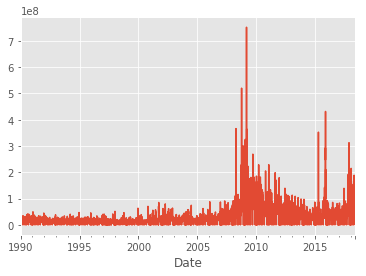

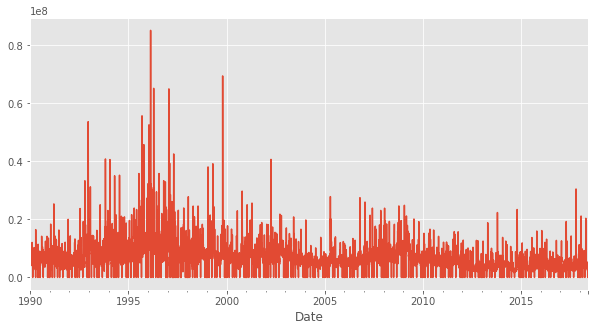

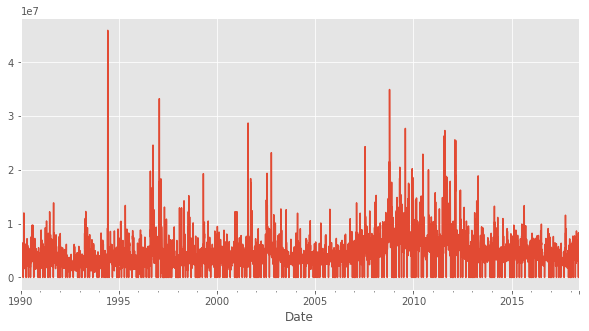

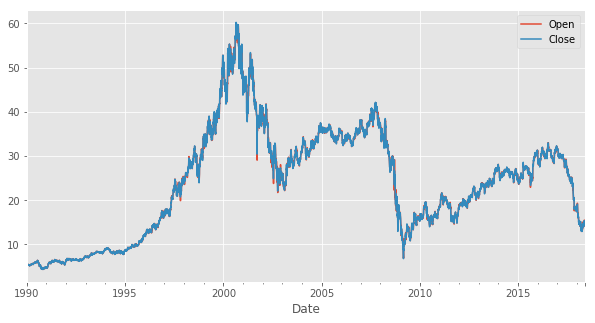

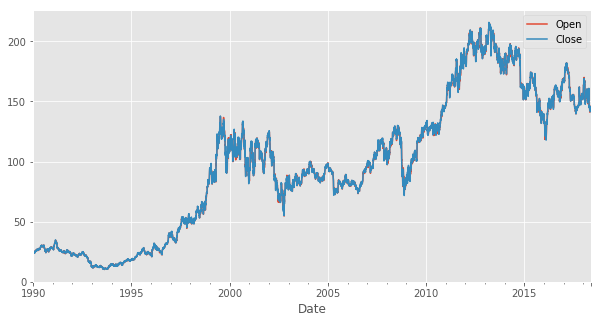

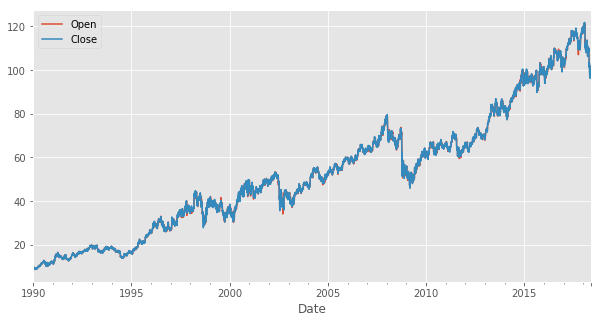

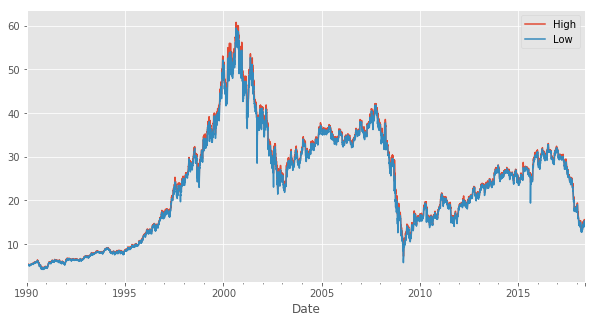

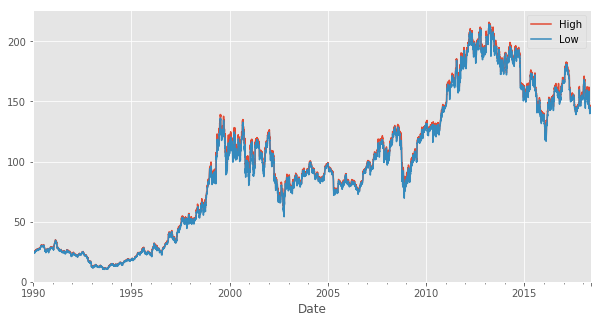

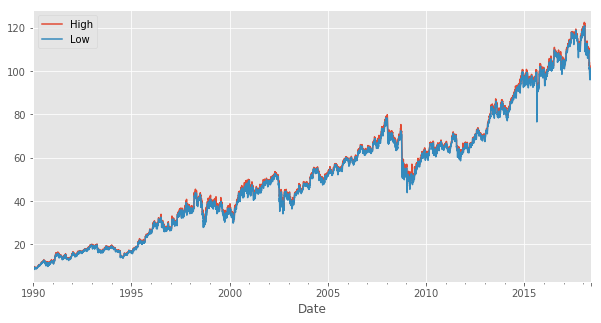

In [4]:
ge_raw['Volume'].plot()
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

ibm_raw['Volume'].plot()
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

pep_raw['Volume'].plot()
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

ge_raw[['Open','Close']].plot()
ibm_raw[['Open','Close']].plot()
pep_raw[['Open','Close']].plot()
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

ge_raw[['High','Low']].plot()
ibm_raw[['High','Low']].plot()
pep_raw[['High','Low']].plot()
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

Moving average is a technique to smooth out the random fluctuations observed over a short period of time from a time series. The diagrams below displays the behaboir of the stock prices of the stated firms with a rollover for a window of 30, 180 and 360 days respectively. The plots indicate that all the series become smother with wider rollover window.

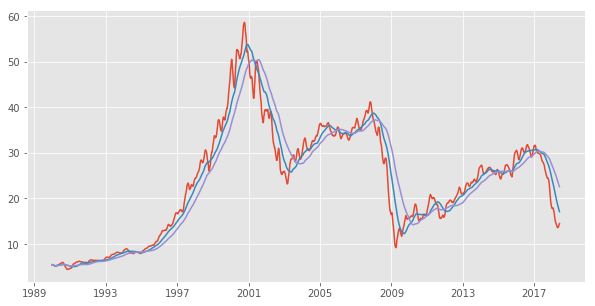

In [5]:
ge_raw['30days'] = ge_raw['Close'].rolling(window=30,min_periods=0).mean()
ge_raw['180days'] = ge_raw['Close'].rolling(window=180,min_periods=0).mean()
ge_raw['360days'] = ge_raw['Close'].rolling(window=360,min_periods=0).mean()

fig = plt.subplot2grid((2,1), (0,0), rowspan=10, colspan=1)
fig.plot(ge_raw.index, ge_raw['30days'])
fig.plot(ge_raw.index, ge_raw['180days'])
fig.plot(ge_raw.index, ge_raw['360days'])
plt.show()

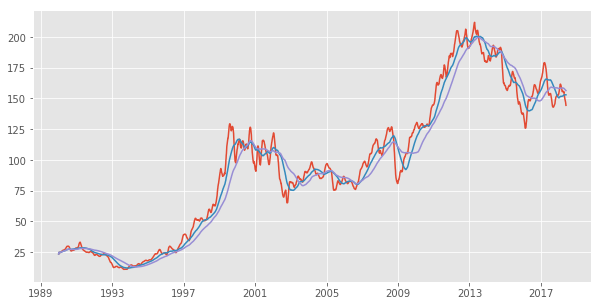

In [6]:
ibm_raw['30days'] = ibm_raw['Close'].rolling(window=30,min_periods=0).mean()
ibm_raw['180days'] = ibm_raw['Close'].rolling(window=180,min_periods=0).mean()
ibm_raw['360days'] = ibm_raw['Close'].rolling(window=360,min_periods=0).mean()

fig = plt.subplot2grid((2,1), (0,0), rowspan=10, colspan=1)
fig.plot(ibm_raw.index, ibm_raw['30days'])
fig.plot(ibm_raw.index, ibm_raw['180days'])
fig.plot(ibm_raw.index, ibm_raw['360days'])
plt.show()

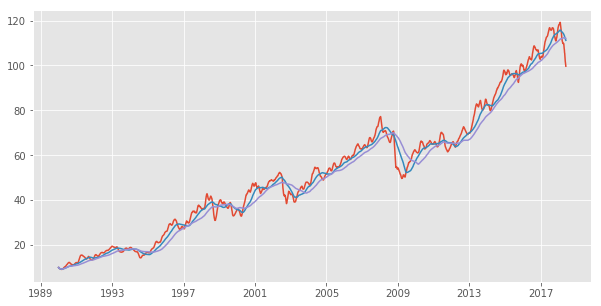

In [7]:
pep_raw['30days'] = pep_raw['Close'].rolling(window=30,min_periods=0).mean()
pep_raw['180days'] = pep_raw['Close'].rolling(window=180,min_periods=0).mean()
pep_raw['360days'] = pep_raw['Close'].rolling(window=360,min_periods=0).mean()

fig = plt.subplot2grid((2,1), (0,0), rowspan=10, colspan=1)
fig.plot(pep_raw.index, pep_raw['30days'])
fig.plot(pep_raw.index, pep_raw['180days'])
fig.plot(pep_raw.index, pep_raw['360days'])
plt.show()

### Future Contract Rolling

For this analysis, we use the closing stock prices for each firm and few future expiry dates are first set to start with. 

In [8]:
ge_close = ge_raw['Close']
ibm_close = ibm_raw['Close']
pep_close = pep_raw['Close']

In [9]:
ge_close.head()

Date
1990-01-01    5.3750
1990-01-02    5.5625
1990-01-03    5.5521
1990-01-04    5.5208
1990-01-05    5.4688
Name: Close, dtype: float64

In [10]:
ibm_close.head()

Date
1990-01-01    23.5313
1990-01-02    24.5000
1990-01-03    24.7188
1990-01-04    25.0000
1990-01-05    24.9375
Name: Close, dtype: float64

In [11]:
pep_close.head()

Date
1990-01-01    9.8039
1990-01-02    9.8423
1990-01-03    9.7465
1990-01-04    9.6507
1990-01-05    9.5167
Name: Close, dtype: float64

In [12]:
expiry = {'ESU2': dt.datetime(2018, 9, 21),
          'ESZ2': dt.datetime(2018, 12, 21)}

expiry = Series(expiry).sort_values()

expiry

ESU2   2018-09-21
ESZ2   2018-12-21
dtype: datetime64[ns]

We use finance prices along with a random walk and some noise to simulate the two contracts into the future. A seed of 111111 is used to initialize the random number generator. The random number generator with a known seed allows the results to be duplicated later. We decide to use 200 simulated data points for this analysis.

In [13]:
np.random.seed(111111)
N = 200

The distance for each random walk step is calculated by generating an array of 200 random integers between 0 and 200, subtracting 100 and multiplying by 0.25, ((0, 200, size=N) - 100)(0.25)). These numbers are stored in the array called walk. The noise for each step is calculated by generating 200 random integers between 0 and 20, subtracting 10 and multiplying by 0.25, (0, 20, size=N) - 10)(0.25)). These numbers are stored in the array called perturb. Finally, the array walk is then converted into a cumulative sum.

In [14]:
walk = (np.random.randint(0, 200, size=N) - 100) * 0.25
perturb = (np.random.randint(0, 20, size=N) - 10) * 0.25
walk = walk.cumsum()

Inorder to encapsulate the dates from the historical data and the additional 200 simulated dates, we create a date range for businessdays which is stored in the array 'rng' for respective companies.

In [15]:
rng_ge = pd.date_range(ge_close.index[0], periods=len(ge_close) + N, freq='B')
rng_ibm = pd.date_range(ibm_close.index[0], periods=len(ibm_close) + N, freq='B')
rng_pep = pd.date_range(pep_close.index[0], periods=len(pep_close) + N, freq='B')

Now we can create two time series, the near contrant and the far contract. First, we create the near contract by adding the cumulative walk values to the last element in the series of closing stock prices. Secondly, the far contract is created by adding the cumulative walk values, the random noise generated in the perturb time series and the last element in the closing stock time series. These two contracts are then used to create a prices dataframe.

In [16]:
near_ge = np.concatenate([ge_close.values, ge_close.values[-1] + walk])
far_ge = np.concatenate([ge_close.values, ge_close.values[-1] + walk + perturb])
prices_ge = DataFrame({'ESU2': near_ge, 'ESZ2': far_ge}, index=rng_ge)

near_ibm = np.concatenate([ibm_close.values, ibm_close.values[-1] + walk])
far_ibm = np.concatenate([ibm_close.values, ibm_close.values[-1] + walk + perturb])
prices_ibm = DataFrame({'ESU2': near_ibm, 'ESZ2': far_ibm}, index=rng_ibm)

near_pep = np.concatenate([pep_close.values, pep_close.values[-1] + walk])
far_pep = np.concatenate([pep_close.values, pep_close.values[-1] + walk + perturb])
prices_pep = DataFrame({'ESU2': near_pep, 'ESZ2': far_pep}, index=rng_pep)

The behabior of two contracts for each of three firms are displayed below.

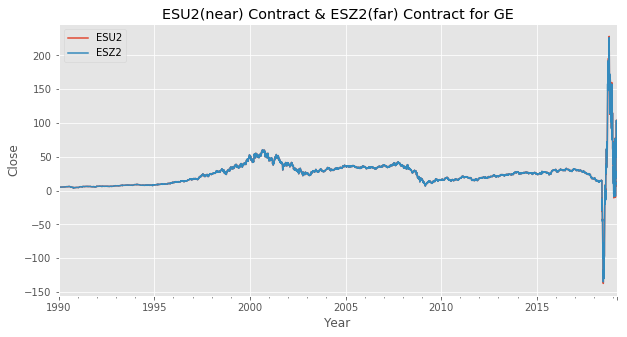

In [17]:
prices_ge.plot()
plt.title("ESU2(near) Contract & ESZ2(far) Contract for GE")
plt.xlabel("Year")
plt.ylabel("Close")
plt.show()

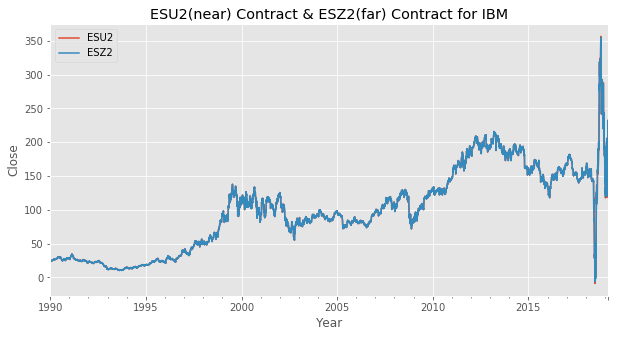

In [18]:
prices_ibm.plot()
plt.title("ESU2(near) Contract & ESZ2(far) Contract for IBM")
plt.xlabel("Year")
plt.ylabel("Close")
plt.show()

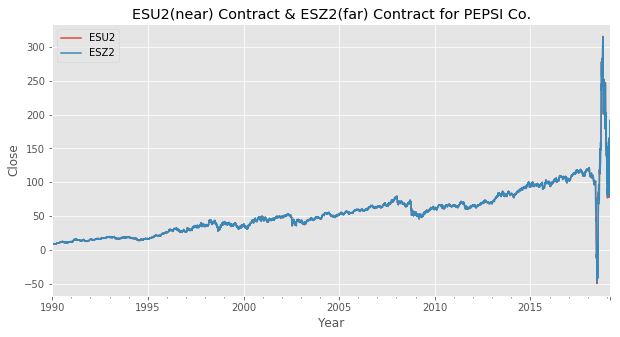

In [19]:
prices_pep.plot()
plt.title("ESU2(near) Contract & ESZ2(far) Contract for PEPSI Co.")
plt.xlabel("Year")
plt.ylabel("Close")
plt.show()

One way to splice time series together into a single continuous series is to construct a weighting matrix. Active contracts would have a weight of 1 until the expiry date approaches. At that point you have to decide on a roll convention. Here is a function that computes a weighting matrix with linear decay over a number of periods leading up to expiry.

In [20]:
def get_roll_weights(start, expiry, items, roll_periods=5):
    # start : first date to compute weighting DataFrame
    # expiry : Series of ticker -> expiration dates
    # items : sequence of contract names
    dates = pd.date_range(start, expiry[-1], freq='B')
    weights = DataFrame(np.zeros((len(dates), len(items))),
    index=dates, columns=items)
    prev_date = weights.index[0]
    
    for i, (item, ex_date) in enumerate(expiry.iteritems()):
        if i < len(expiry) - 1:
            weights.loc[prev_date:ex_date - pd.offsets.BDay(), item] = 1
            roll_rng = pd.date_range(end=ex_date - pd.offsets.BDay(),
            periods=roll_periods + 1, freq='B')
            decay_weights = np.linspace(0, 1, roll_periods + 1)
            weights.loc[roll_rng, item] = 1 - decay_weights
            weights.loc[roll_rng, expiry.index[i + 1]] = decay_weights
        else:
            weights.loc[prev_date:, item] = 1
            
        prev_date = ex_date
        
    return weights

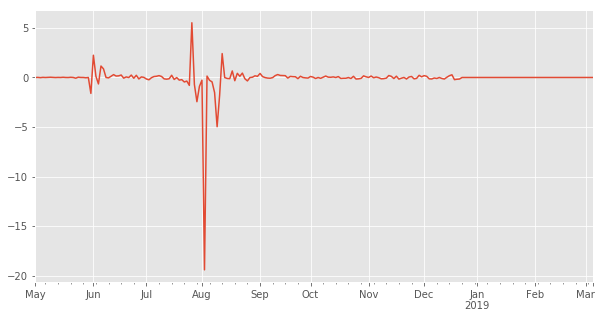

In [21]:
weights = get_roll_weights('5/1/2018', expiry, prices_ge.columns)

weights.loc['2018-09-12':'2018-09-21']

rolled_returns = (prices_ge.pct_change() * weights).sum(1)
rolled_returns['2018-05-01':].mean()
rolled_returns['2018-05-01':].plot()

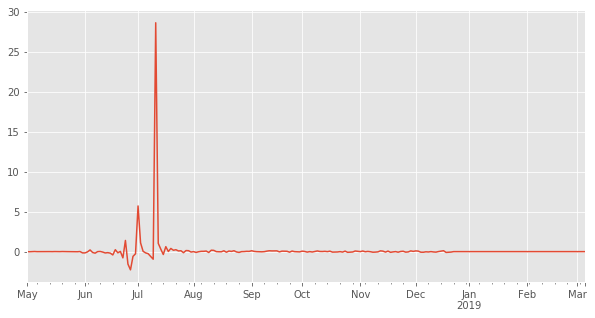

In [22]:
weights = get_roll_weights('5/1/2018', expiry, prices_ibm.columns)

weights.loc['2018-09-12':'2018-09-21']

rolled_returns = (prices_ibm.pct_change() * weights).sum(1)
rolled_returns['2018-05-01':].mean()
rolled_returns['2018-05-01':].plot()

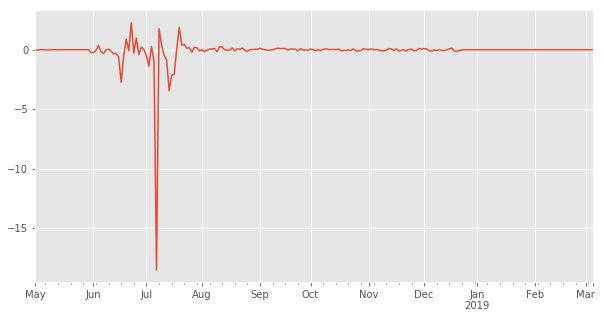

In [24]:
weights = get_roll_weights('5/1/2018', expiry, prices_pep.columns)

weights.loc['2018-09-12':'2018-09-21']

rolled_returns = (prices_pep.pct_change() * weights).sum(1)
rolled_returns['2018-05-01':].mean()
rolled_returns['2018-05-01':].plot()

### Rolling Correlation between Stocks

Rolling correlation is a statistic that measures the nature of co-movement between two different set of stock prices. To calculate this we first take the percentage change in stock prices over different time points.

In [25]:
ge_rets = ge_close.pct_change()
ibm_rets = ibm_close.pct_change()
pep_rets = pep_close.pct_change()

The diagrams below show the pairwise correlation between stock price change between GE, IBM and Pepsi respectively.

C:\Users\Sudip\Anaconda3\envs\python3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=250).corr(other=<Series>)


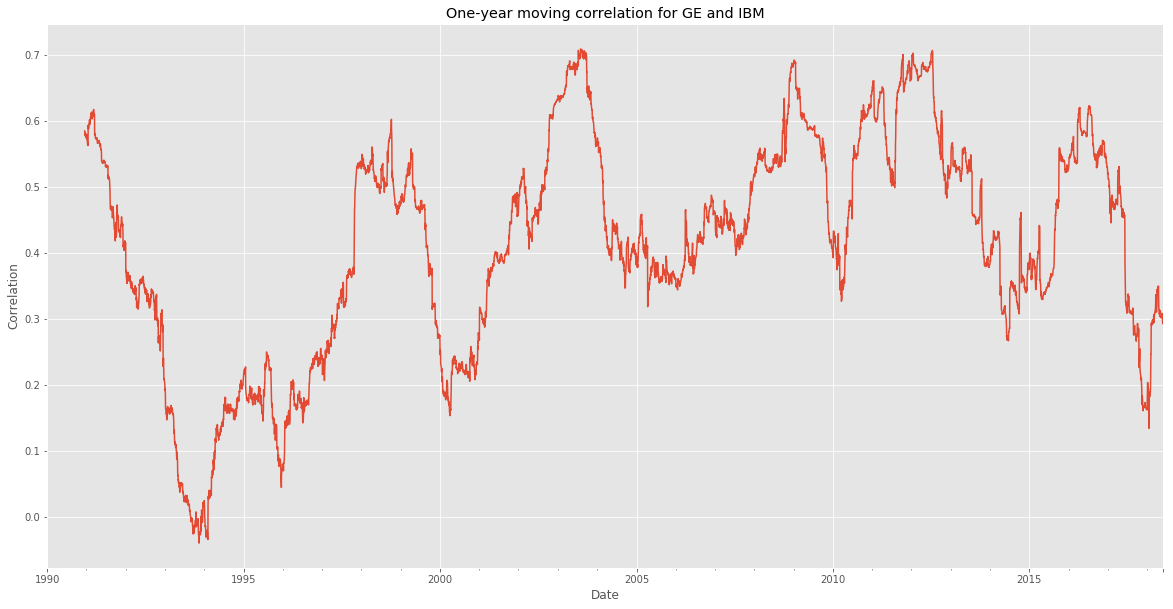

In [26]:
plt.rcParams["figure.figsize"] = (20,10)
plt.title("One-year moving correlation for GE and IBM")
plt.ylabel("Correlation")
pd.rolling_corr(ge_rets, ibm_rets, 250).plot()

C:\Users\Sudip\Anaconda3\envs\python3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=250).corr(other=<Series>)


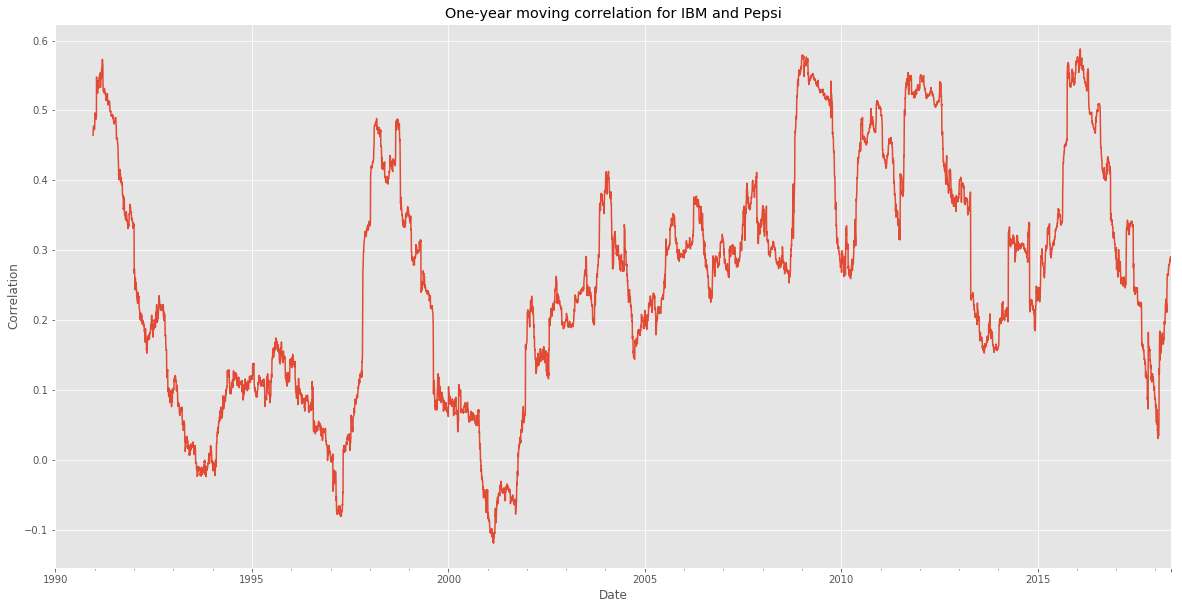

In [27]:
plt.rcParams["figure.figsize"] = (20,10)
plt.title("One-year moving correlation for IBM and Pepsi")
plt.ylabel("Correlation")
pd.rolling_corr(ibm_rets, pep_rets, 250).plot()

C:\Users\Sudip\Anaconda3\envs\python3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=250).corr(other=<Series>)


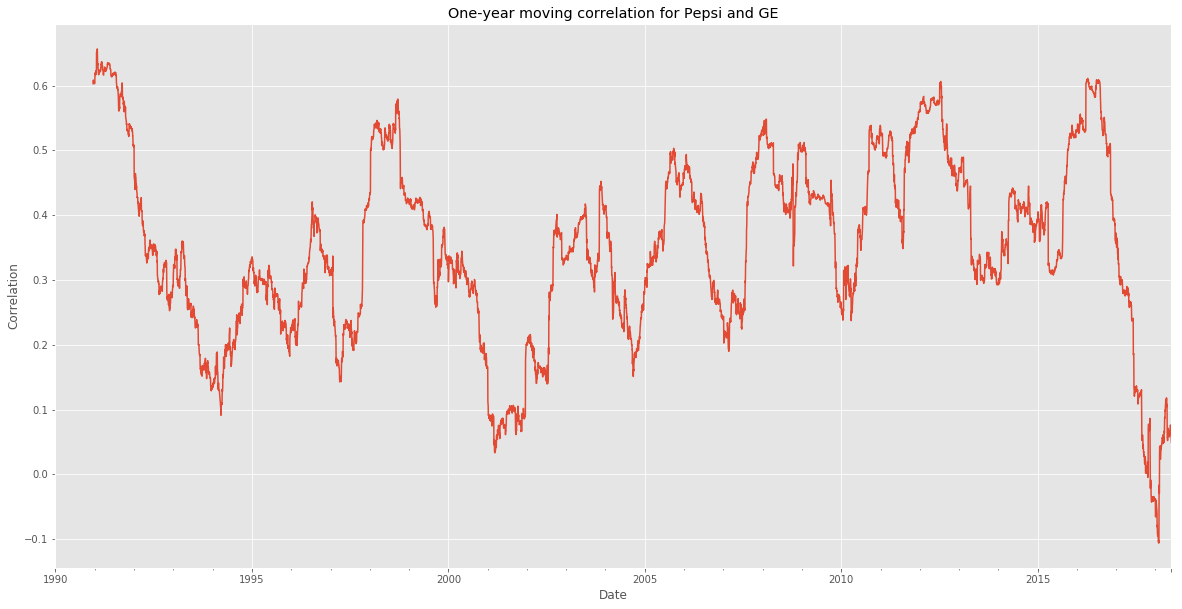

In [28]:
plt.rcParams["figure.figsize"] = (20,10)
plt.title("One-year moving correlation for Pepsi and GE")
plt.ylabel("Correlation")
pd.rolling_corr(pep_rets, ge_rets, 250).plot()

### Future Work

### References

1. Pyton for Data Analysis by Wes McKinney (Available at: https://s3-us-west-2.amazonaws.com/smu-mds/prod/Quantifying+the+World/Course+Materials/Python4DataAnalysis.pdf)

2. QuantStart (01.29.2014) (Available at: https://www.quantstart.com/articles/Continuous-Futures-Contracts-for-Backtesting-Purposes)